In [515]:
import pandas as pd
import numpy as np

In [516]:
# for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [517]:
data = pd.read_csv("train.csv")

print(data.shape)

data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [518]:
#remove id variable that shows for each house
data.drop(columns='Id', inplace=True)

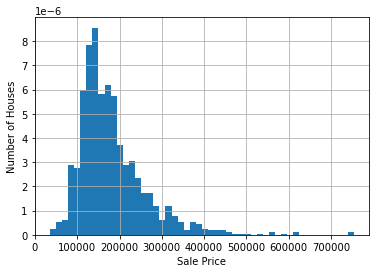

In [519]:
# First thing is to analyze the target in this case it is saleprice of houses
data["SalePrice"].hist(bins=50, density=True)
plt.ylabel('Number of Houses')
plt.xlabel('Sale Price')
plt.show()

# Log transformation and its visual

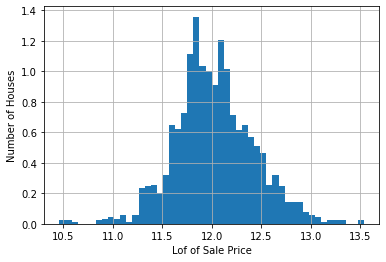

In [520]:
# transforming the target using logarithm 
np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel("Number of Houses")
plt.xlabel("Lof of Sale Price")
plt.show()

# e^0=1 , e^1=2.718, e^2=7.3, e^4.6=100 
# e is 2.718 in math and log represents numbers in power of e


In [521]:
#capturing categorical variables
cat_vars = [var for var in data.columns if data[var].dtype == 'object']

# adding subclass category
cat_vars = cat_vars + ["MSSubClass"]

In [522]:
len(cat_vars)
data[cat_vars] = data[cat_vars].astype("object")

In [523]:
num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalesPrice']

In [524]:
len(num_vars)

36

In [525]:
data[num_vars]

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0          196.0         706           0        150          856       856   
1            0.0         978           0        284         1262      1262   
2          162.0         486           0        434          920       920   
3            0.0         216           0        540          756       961   
4          350.0         655           0        490         1145      1145   
...          ...         ...         ...        ...          ...       ...   
1455         0.0           0           0        953          953       953   
1456       119.0         790         163        589         1542      2073   
1457         0.0         275           0        877         1152      1188   
1458         0.0          49        1029          0         1078      1078   
1459         0.0         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2003.0           2         548           0           61   
1          1976.0           2         460         298            0   
2          2001.0           2         608       

In [526]:
# finding missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0 ]

In [527]:
# mean shows percentage of missing variable and sum shows total of missing data for that var
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [528]:
# now we can determine how many of the missing varibales are categorical and numberical

cat_na = [var for var in cat_vars if var in vars_with_na]
var_na = [var for var in num_vars if var in vars_with_na]

print('Number of numerical variables: ', len(var_na))
print('Number of categorical variables ', len(cat_na))      

Number of numerical variables:  3
Number of categorical variables  16


In [529]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [530]:
def analyse_na_value(df, var):
    df=df.copy()
    # inserting 1 where val is missing or 0
    df[var] = np.where(df[var].isnull(), 1, 0)
    # assign tmp to mean and std of Sales price
    tmp = df.groupby(var)["SalePrice"].agg(['mean', 'std'])
        
    # plot
    tmp.plot(kind="barh", y="mean", legend=False,
            xerr="std", title="SalePrice", color="green")
    
    plt.show()
    

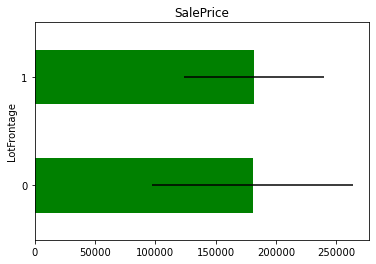

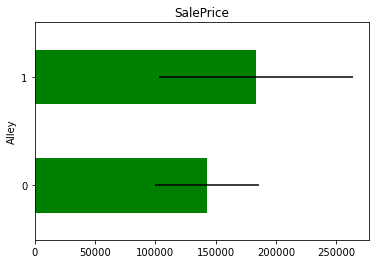

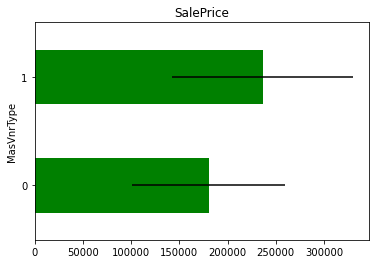

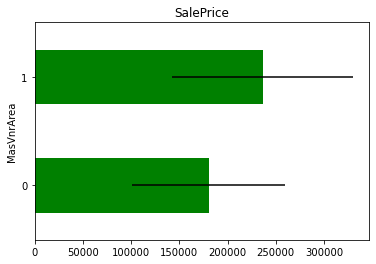

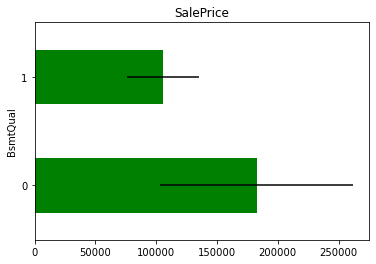

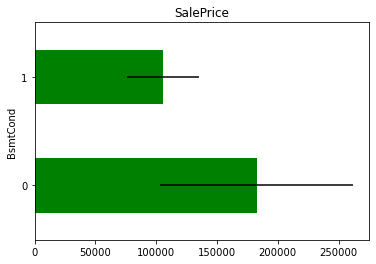

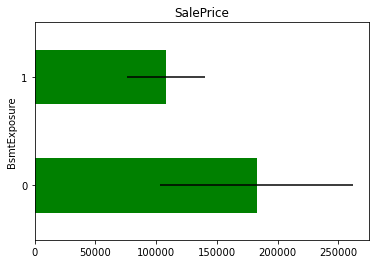

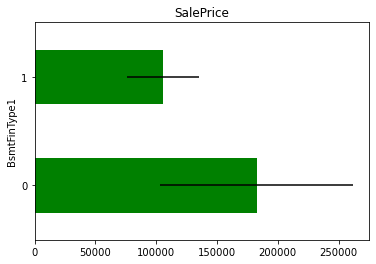

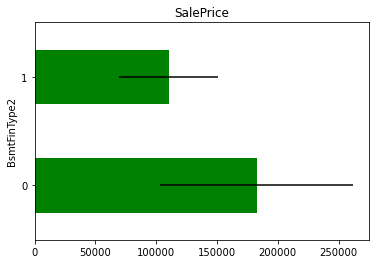

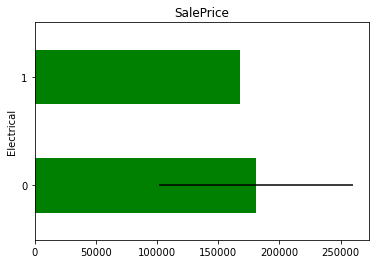

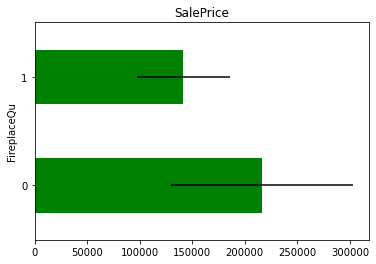

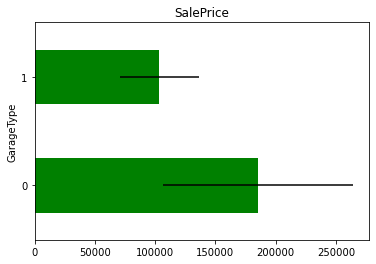

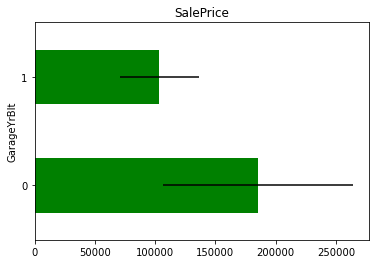

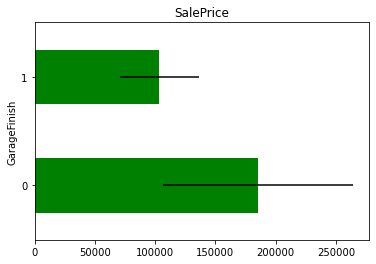

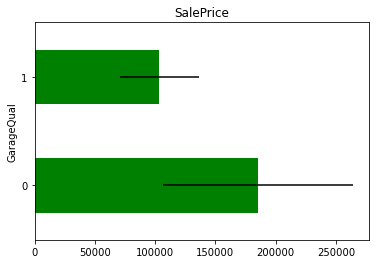

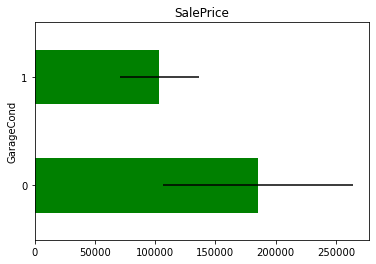

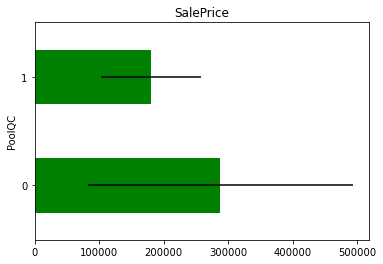

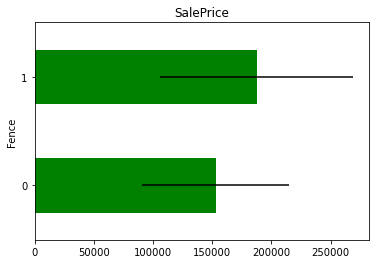

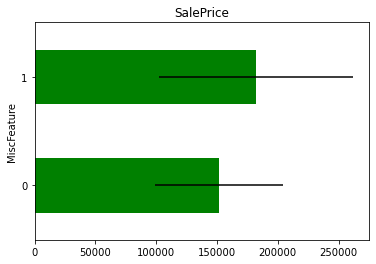

In [531]:
# line is the std and distance of bar is the mean for 1 (missing data) or 0 not missing data

for var in vars_with_na:
    analyse_na_value(data, var)

In [532]:
# list variables that has year information

years_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

In [533]:
# exploring values in these variables

for var in years_vars:
    unique_vals = data[var].unique()
    sorted_vals = sorted(unique_vals)
    print(var, sorted_vals)
    print()

YearBuilt [1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

YearRemodAdd [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

<AxesSubplot:xlabel='YrSold'>

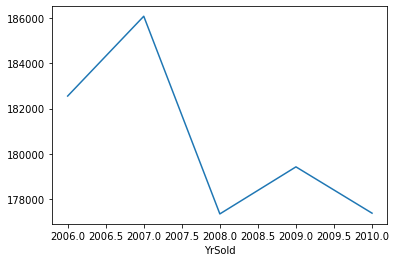

In [534]:
# median sales price vs year in which it was sold

data.groupby('YrSold')["SalePrice"].agg("mean").plot()

Text(0, 0.5, 'Mean of Houses Price')

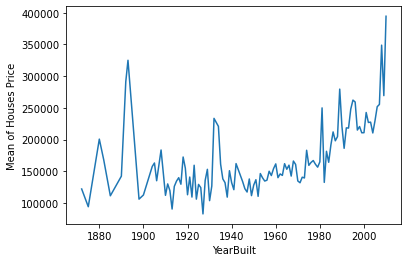

In [535]:
data.groupby("YearBuilt")["SalePrice"].agg("mean").plot()
plt.ylabel("Mean of Houses Price")

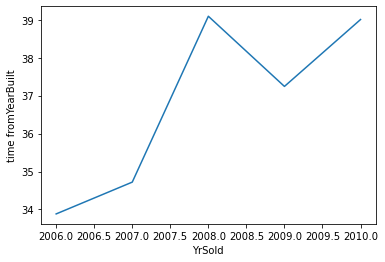

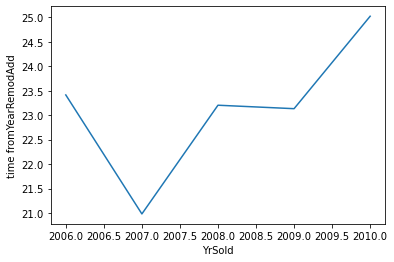

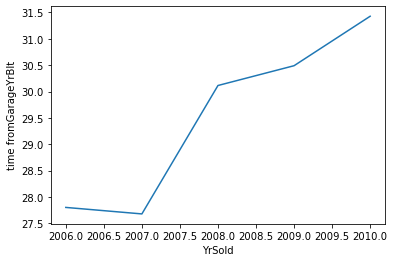

In [536]:
# analysing year difference between year variable and year in which house was sold

def analyse_years_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].agg("mean").plot()
    plt.ylabel('time from' + var)
    plt.show()
    
    
    
    
    
for var in years_vars:
    if var != 'YrSold':
        analyse_years_vars(data, var)

# Discerete Var

In [537]:
# finding variables with discrete values if they have less than 20 unique vals then they are considered discrete val

disceret_vars = [var for var in num_vars if len(data[var].unique())< 20 and var not in years_vars]

print('Number of Desceret variables: ', len(disceret_vars))

Number of Desceret variables:  13


In [538]:
data[disceret_vars].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

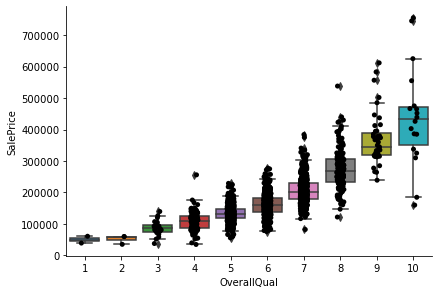

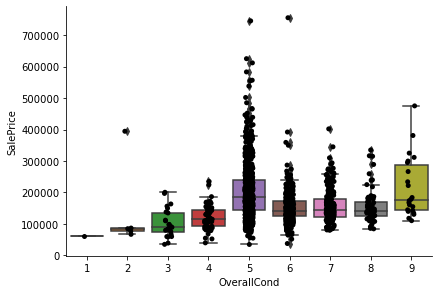

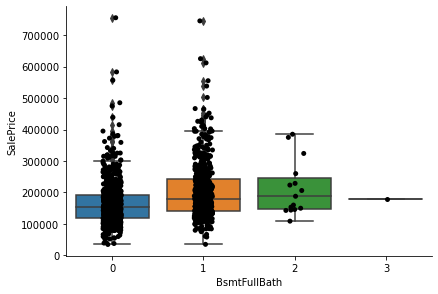

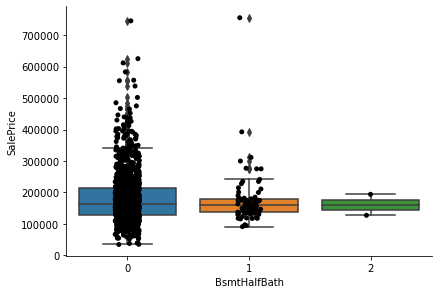

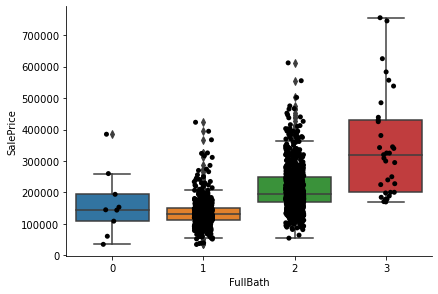

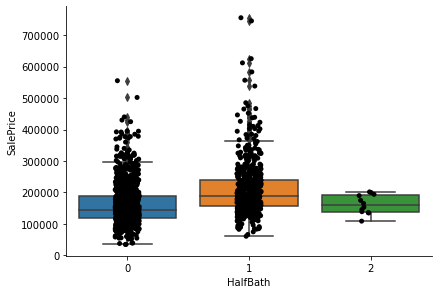

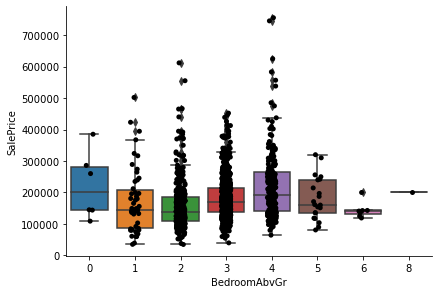

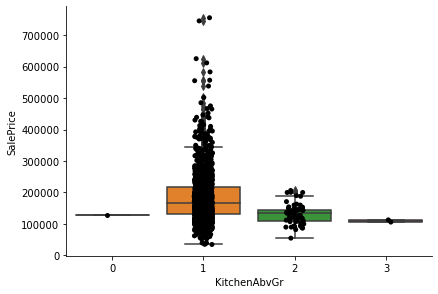

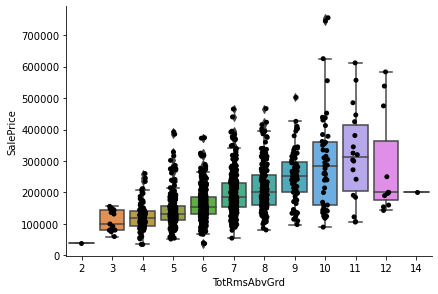

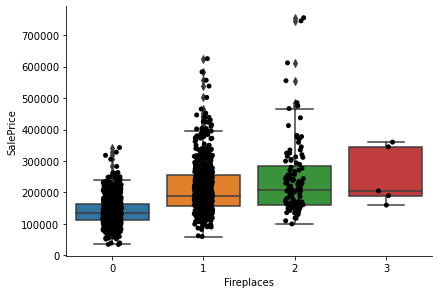

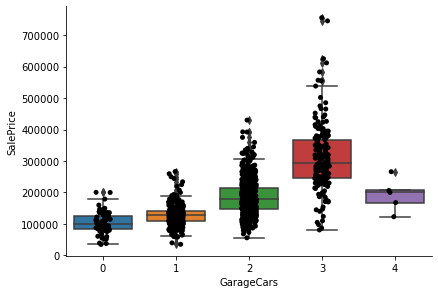

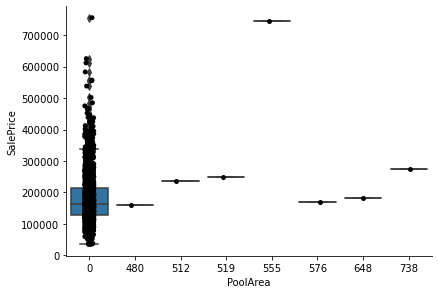

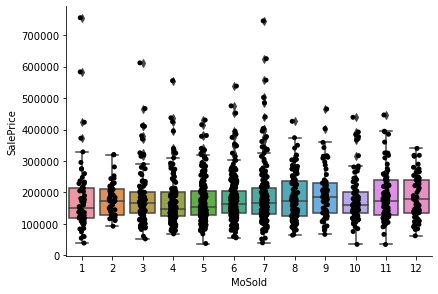

In [539]:
for var in disceret_vars:
    sns.catplot(x=var,y='SalePrice',data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=var, y='SalePrice', data=data, color='k')
    plt.show()

# Continuous Var

In [540]:
# finding variables with continuous variables

cont_vars = [var for var in num_vars if len(data[var].unique()) >= 20 and var not in years_vars and var != "SalePrice"]

In [541]:
len(cont_vars)

18

In [542]:
data[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  
0           0           61              0          0            0        0  
1         298            0              0          0            0        0  
2           0           42              0          0            0        0  
3           0           35            272          0            0        0  
4         192           84              0          0            0        0

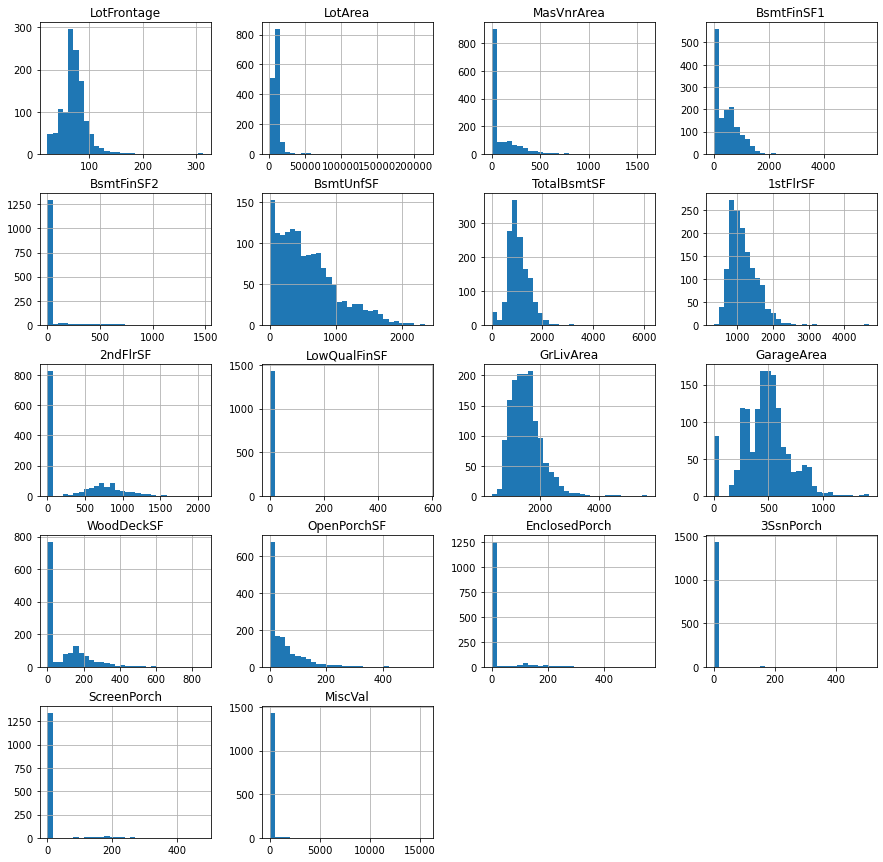

In [543]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [544]:
# first make a list of super skewed variables
skewed = ["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MiscVal"]


In [545]:
cont_vars = [var for var in cont_vars if var not in skewed]

In [546]:
cont_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

# yeo-johnson transformation

In [547]:
# lets analyse the distribution of cont_vars varibales after applying yeo-johnson transformation

In [548]:
from sklearn.preprocessing import PowerTransformer

In [549]:
# copy data
tmp = data.copy()

# Create the transformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')
#fit
pt.fit(tmp[num_vars])
#transform
transformed_num_vars = pt.transform(tmp[num_vars])

/Users/gorkemvarol/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [550]:
tmp2 = pd.DataFrame(transformed_num_vars, columns=tmp[num_vars].columns)

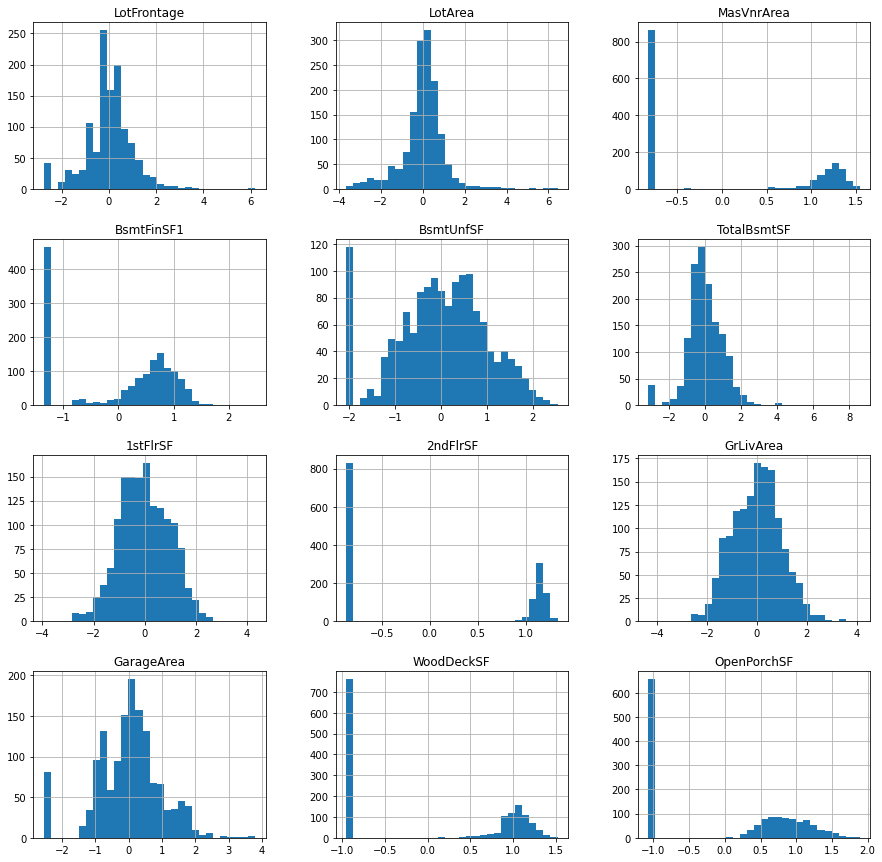

In [551]:
tmp2[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

# Logarithmic transformation

In [552]:
# Log transformation on some contunious variables as log can only be applied to postive numbers unlike yeo-johnson

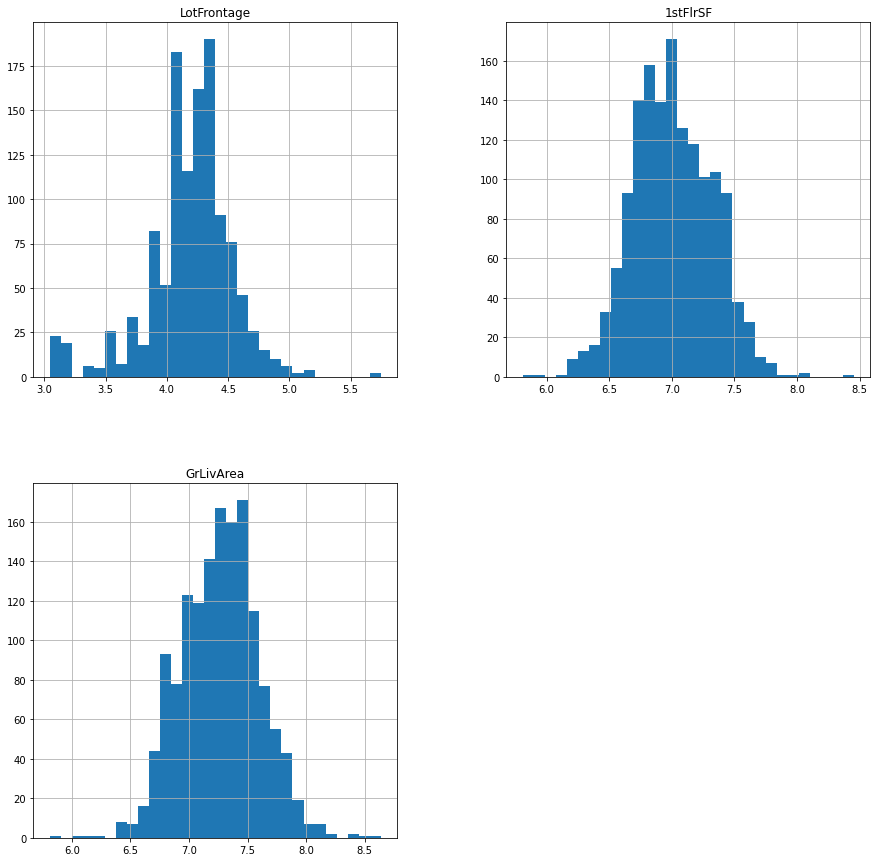

In [553]:
tmp = data.copy()

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    #transform with log
    tmp[var] = np.log(data[var])
    
tmp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=30, figsize=(15,15))
plt.show()

# conclusion we can choose either yeo-johnson or log results are similar

# 000--000

In [554]:
# Cont variable with skewed data
# trasform these data into binary variables and see how predictive they are:

In [555]:
data[skewed]

BsmtFinSF2  LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal
0              0             0              0          0            0        0
1              0             0              0          0            0        0
2              0             0              0          0            0        0
3              0             0            272          0            0        0
4              0             0              0          0            0        0
...          ...           ...            ...        ...          ...      ...
1455           0             0              0          0            0        0
1456         163             0              0          0            0        0
1457           0             0              0          0            0     2500
1458        1029             0            112          0            0        0
1459         290             0              0          0            0        0

[1460 rows x 6 columns]

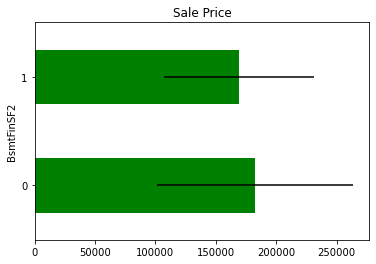

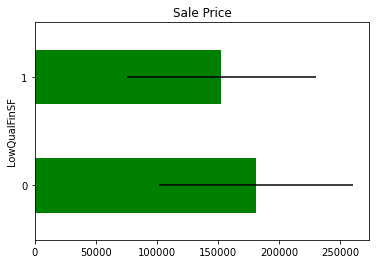

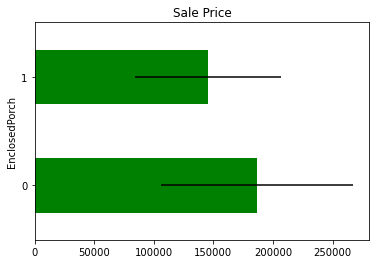

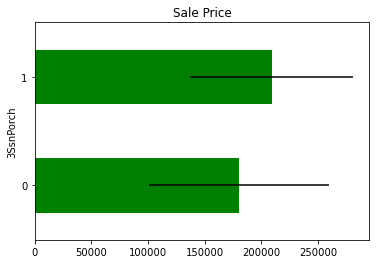

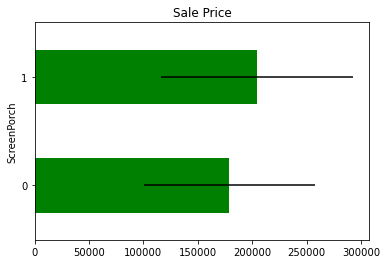

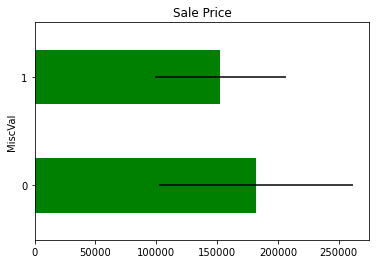

In [556]:
for var in skewed:
    
    tmp=data.copy()
    
    #map variables into 0 and 1:
    tmp[var] = np.where(tmp[var]==0, 0, 1)
    
    #determine mean salesprice of vars:
    tmp = tmp.groupby(var)["SalePrice"].agg(["mean", "std"])
    
    tmp.plot(kind='barh', y="mean", legend=False, xerr="std", title="Sale Price", color="green")
    
    plt.show()

In [557]:
print('Number of categorical varibales :', len(cat_vars))
data[cat_vars].head()

Number of categorical varibales : 44


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

# Categorical cardinality

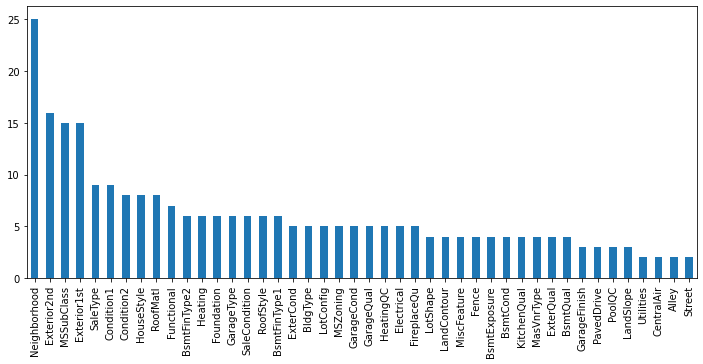

In [558]:
# we count unique categories 
# plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()

# Neighbordhood is very cardinal

In [559]:
# Picking quality categories and mapping them (NOTE:qual means not quality it is a category)

In [560]:
#temp[cat_vars] = temp[cat_vars].replace(np.nan, "NA")

In [561]:
data1 = data.copy()

In [562]:
data[cat_vars] = data[cat_vars].replace(np.nan, "NA")

In [563]:
# re-mapping some of the categorcial variables that seem important to us.

# Template :
# Ex = Excellent
# Gd = Good
# TA = Average/Typical
# Fa = Fair
# Po = Poor

#picking qual categories 
qual_vars = ['ExterQual', 'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']



#start with dict
qual_mappings = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5, "Missing":0, "NA":0}



for var in qual_vars:
    data[var] = data[var].map(qual_mappings)


In [564]:
exposure_mappings = {"Missing":0, "Mn":2, "Av":3, "Gd":4, "No":1, "NA":0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [565]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [566]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)

In [567]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [568]:
# Capturing all quality variables

quality_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

In [571]:
data[quality_vars].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          4          3         4         3          5            4   
1          3          3         4         3          5            3   
2          4          3         4         3          5            4   
3          3          3         3         4          4            4   
4          4          3         4         3          5            4   

   FireplaceQu  GarageQual  GarageCond  BsmtFinType1  BsmtFinType2  \
0            0           3           3             6             1   
1            3           3           3             5             1   
2            3           3           3             6             1   
3            4           3           3             5             1   
4            3           3           3             6             1   

   BsmtExposure  GarageFinish  Fence  
0             1             2      0  
1             4             2      0  
2             2             2      0  
3             1             1      0  
4             3             2      0

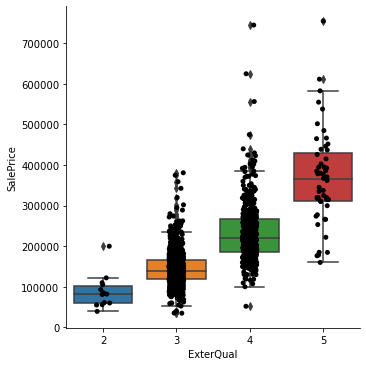

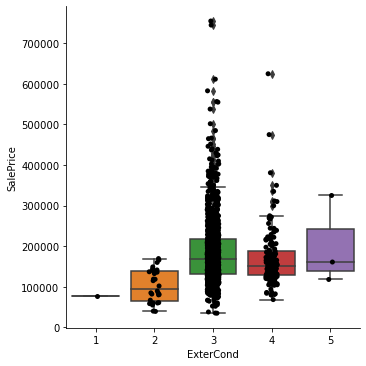

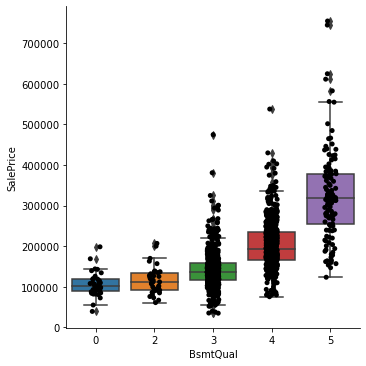

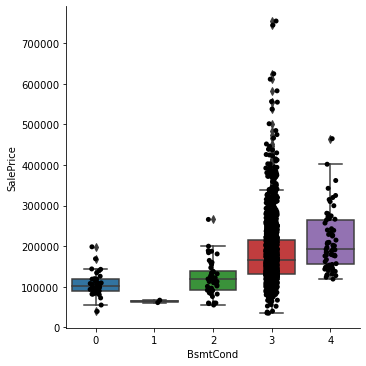

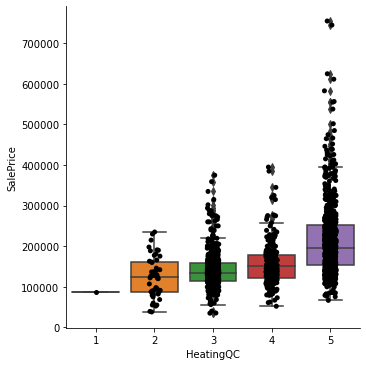

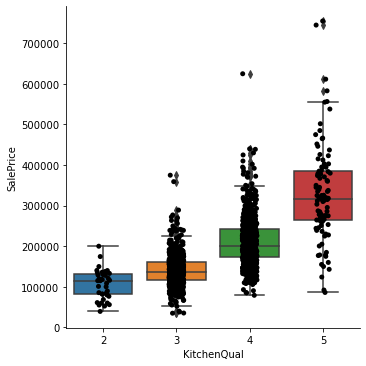

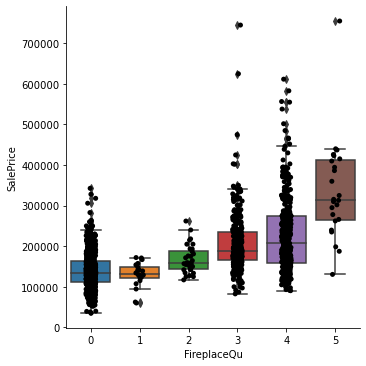

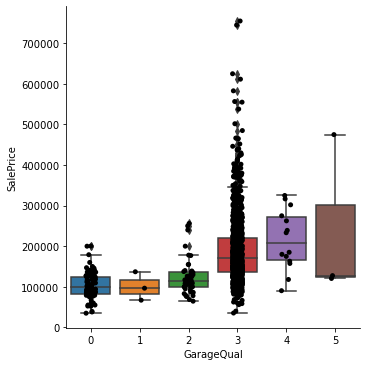

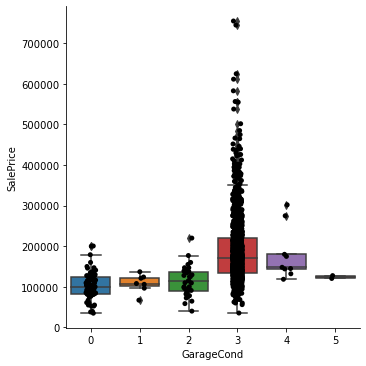

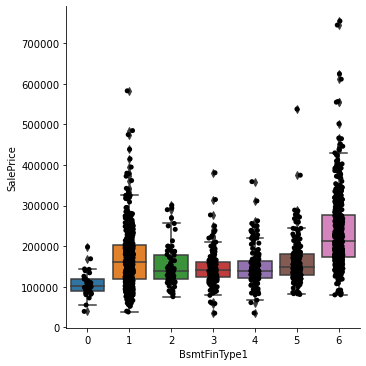

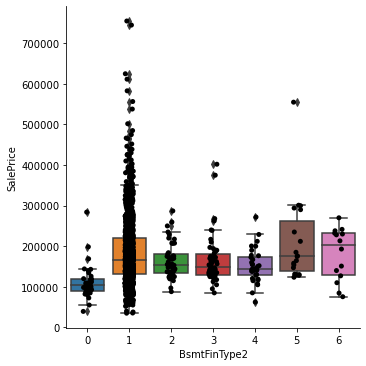

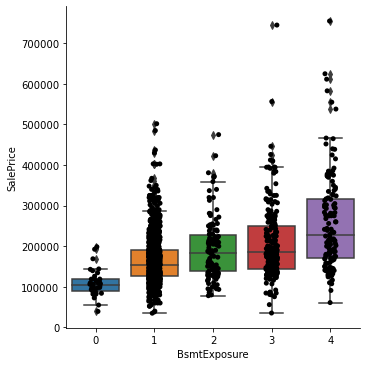

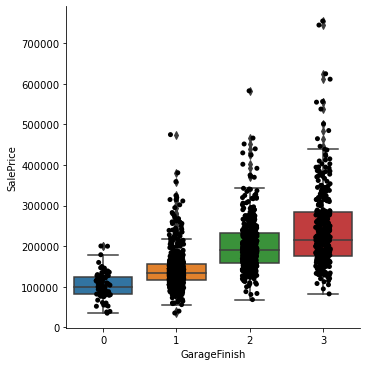

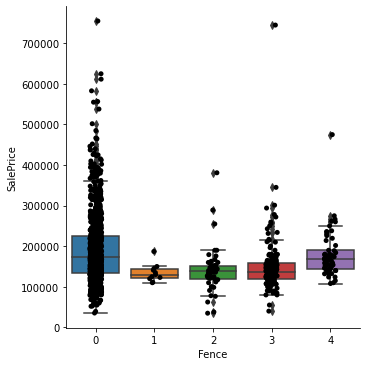

In [575]:
for var in quality_vars:
    sns.catplot(x=var,y="SalePrice", kind="box",data=data)
    sns.stripplot(x=var,y="SalePrice", data=data, color="k")
    plt.show()

In [577]:
# capture remaining categorical variables:

cat_others = [var for var in cat_vars if var not in quality_vars]

In [579]:
len(cat_others)

30